
# Description vs. Inference

We’ll practice moving from *describing* variables to *inferring* relationships and fitting simple models—this time with penguins library.




## Setup


In [1]:
!conda install scipy -y
!conda install statsmodels -y

/Users/smore/miniconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
/Users/smore/miniconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configur

In [2]:

#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

#np.random.seed(42)  # reproducibility (if we simulate anything)
#print("Versions -> numpy", np.__version__, "| pandas", pd.__version__)



## 1) Load the Palmer Penguins dataset
We’ll try the `palmerpenguins` package first; if it’s not available, we’ll fall back to reading the CSV from GitHub.
Then we’ll keep only rows with complete data for the variables we plan to use.


In [4]:

# Try package; fallback to CSV URL
try:
    from palmerpenguins import load_penguins
    peng = load_penguins()
except Exception as e:
    url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
    peng = pd.read_csv(url)

cols_needed = ["body_mass_g", "flipper_length_mm", "bill_length_mm", "bill_depth_mm", "species", "island", "sex"]
peng = peng.dropna(subset=cols_needed).copy()
peng.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007



## 2) Description: what do we have?


In [6]:

desc_mass = stats.describe(peng["body_mass_g"])
#desc_flipper = stats.describe(peng["flipper_length_mm"])
#desc_bill_len = stats.describe(peng["bill_length_mm"])
#desc_bill_dep = stats.describe(peng["bill_depth_mm"])

print("body_mass_g:", desc_mass)
#print("flipper_length_mm:", desc_flipper)
#print("bill_length_mm:", desc_bill_len)
#print("bill_depth_mm:", desc_bill_dep)


body_mass_g: DescribeResult(nobs=np.int64(333), minmax=(np.float64(2700.0), np.float64(6300.0)), mean=np.float64(4207.057057057057), variance=np.float64(648372.4876985418), skewness=np.float64(0.4701161714183821), kurtosis=np.float64(-0.7404858802598837))


In [11]:

# Grouped description by species (and island)
group_by_species = peng.groupby("species")[["body_mass_g", "flipper_length_mm", "bill_length_mm", "bill_depth_mm"]].describe()
group_by_island  = peng.groupby("island")[["body_mass_g", "flipper_length_mm"]].describe()
#group_by_species, group_by_island
print(group_by_species)

print(group_by_island)


          body_mass_g                                                   \
                count         mean         std     min     25%     50%   
species                                                                  
Adelie          146.0  3706.164384  458.620135  2850.0  3362.5  3700.0   
Chinstrap        68.0  3733.088235  384.335081  2700.0  3487.5  3700.0   
Gentoo          119.0  5092.436975  501.476154  3950.0  4700.0  5050.0   

                          flipper_length_mm              ... bill_length_mm  \
              75%     max             count        mean  ...            75%   
species                                                  ...                  
Adelie     4000.0  4775.0             146.0  190.102740  ...         40.775   
Chinstrap  3950.0  4800.0              68.0  195.823529  ...         51.075   
Gentoo     5500.0  6300.0             119.0  217.235294  ...         49.600   

                bill_depth_mm                                                 \



### 2.1 Quick univariate visuals (always look at the data)


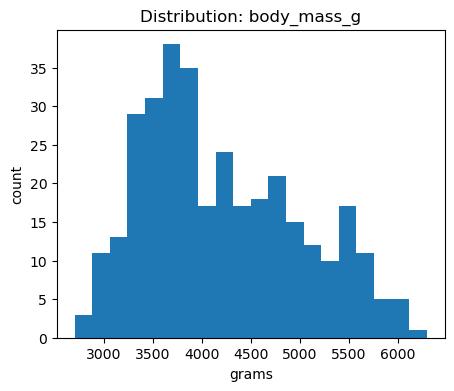

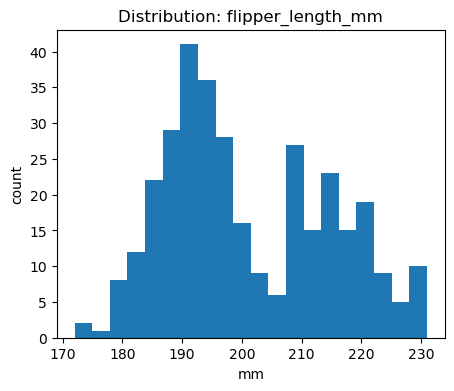

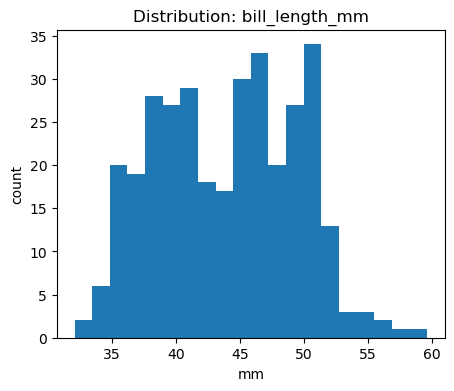

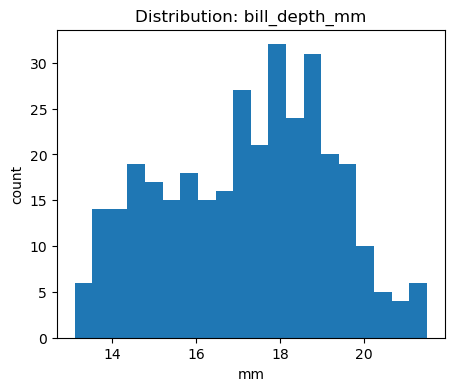

In [12]:

plt.figure(figsize=(5,4))
plt.hist(peng["body_mass_g"], bins=20)
plt.title("Distribution: body_mass_g")
plt.xlabel("grams"); plt.ylabel("count")
plt.show()

plt.figure(figsize=(5,4))
plt.hist(peng["flipper_length_mm"], bins=20)
plt.title("Distribution: flipper_length_mm")
plt.xlabel("mm"); plt.ylabel("count")
plt.show()

plt.figure(figsize=(5,4))
plt.hist(peng["bill_length_mm"], bins=20)
plt.title("Distribution: bill_length_mm")
plt.xlabel("mm"); plt.ylabel("count")
plt.show()

plt.figure(figsize=(5,4))
plt.hist(peng["bill_depth_mm"], bins=20)
plt.title("Distribution: bill_depth_mm")
plt.xlabel("mm"); plt.ylabel("count")
plt.show()



## 3) Inference about relationships: Are variables associated?
We’ll examine the linear association between **flipper length** and **body mass**, then test significance with **Pearson’s r**.


In [14]:

r, p = stats.pearsonr(peng["flipper_length_mm"], peng["body_mass_g"])
print(f"Pearson r(flipper_length_mm, body_mass_g) = {r:.3f}, p-value = {p:.3g}")


Pearson r(flipper_length_mm, body_mass_g) = 0.873, p-value = 3.13e-105


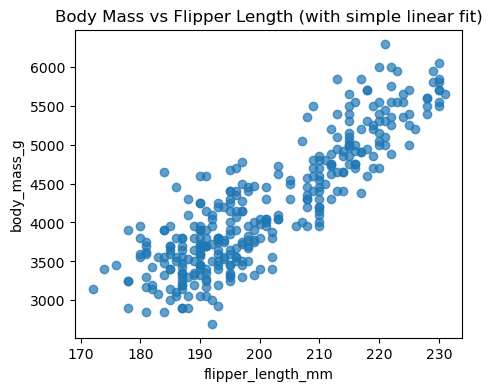

In [19]:
import numpy as np

x = peng["flipper_length_mm"].values
y = peng["body_mass_g"].values
#m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(5,4))
plt.scatter(x, y, alpha=0.7)
#xs = np.linspace(x.min(), x.max(), 200)
#ys = m*xs + b
#plt.plot(xs, ys)
plt.title("Body Mass vs Flipper Length (with simple linear fit)")
plt.xlabel("flipper_length_mm"); plt.ylabel("body_mass_g")
plt.show()


NOTE: See a strong positive trend: heavier penguins tend to have longer flippers

But species differ in size:
Gentoo are generally larger; Adelie are smaller; Chinstrap in between. If you mix species, your “one big trend” blends between-species differences with within-species relationships


### 3.1 Robust checks (optional): Spearman/Kendall


In [20]:

rho, p_rho = stats.spearmanr(peng["flipper_length_mm"], peng["body_mass_g"])
tau, p_tau = stats.kendalltau(peng["flipper_length_mm"], peng["body_mass_g"])
print(f"Spearman rho = {rho:.3f} (p={p_rho:.3g}) | Kendall tau = {tau:.3f} (p={p_tau:.3g})")


Spearman rho = 0.840 (p=4.63e-90) | Kendall tau = 0.661 (p=5.65e-70)



## 4) Modeling with `statsmodels` (OLS)

We’ll fit two models:
1. **Simple model**: `body_mass_g ~ flipper_length_mm + C(species)`  
2. **Expanded model**: `body_mass_g ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(species) + C(sex) + C(island)`

Categoricals via `C(...)` let us *control* for group differences.


In [21]:

model1 = smf.ols("body_mass_g ~ flipper_length_mm + C(species)", data=peng).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     405.3
Date:                Fri, 24 Oct 2025   Prob (F-statistic):          4.14e-110
Time:                        15:56:21   Log-Likelihood:                -2442.6
No. Observations:                 333   AIC:                             4893.
Df Residuals:                     329   BIC:                             4908.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4

In [22]:

model2 = smf.ols("body_mass_g ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(species) + C(sex) + C(island)", data=peng).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     284.1
Date:                Fri, 24 Oct 2025   Prob (F-statistic):          1.85e-141
Time:                        15:56:29   Log-Likelihood:                -2353.6
No. Observations:                 333   AIC:                             4725.
Df Residuals:                     324   BIC:                             4760.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1


### 4.1 Interaction example (optional)
Does the flipper–mass slope differ by species? Add an interaction: `flipper_length_mm * C(species)`.


In [23]:

model_int = smf.ols("body_mass_g ~ flipper_length_mm * C(species) + bill_length_mm + bill_depth_mm + C(sex) + C(island)", data=peng).fit()
print(model_int.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     229.2
Date:                Fri, 24 Oct 2025   Prob (F-statistic):          6.72e-140
Time:                        15:56:42   Log-Likelihood:                -2351.5
No. Observations:                 333   AIC:                             4725.
Df Residuals:                     322   BIC:                             4767.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------


### 4.2 Confidence intervals & predictions


In [24]:

# Confidence intervals on coefficients
model2_ci = model2.conf_int()
model2_ci


,0,1
Intercept,-2632.851522,-367.206669
C(species)[T.Chinstrap],-434.512990,-86.099599
C(species)[T.Gentoo],717.771185,1257.751705
C(sex)[T.male],292.521298,481.927213
C(island)[T.Dream],-128.270894,102.064792
C(island)[T.Torgersen],-167.915334,71.788083
flipper_length_mm,10.455674,22.021338
bill_length_mm,4.149805,32.228826
bill_depth_mm,28.580761,106.570098


In [25]:

# Predictions for hypothetical penguins
new = pd.DataFrame({
    "flipper_length_mm": [180, 200, 220],
    "bill_length_mm": [40, 45, 50],
    "bill_depth_mm": [17, 18, 15],
    "species": ["Adelie", "Chinstrap", "Gentoo"],
    "sex": ["male", "female", "male"],
    "island": ["Torgersen", "Dream", "Biscoe"]
})
pred = model2.get_prediction(new).summary_frame(alpha=0.05)
pred


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3638.417544,70.813319,3499.105598,3777.729490,3055.103474,4221.731614
1,3509.139696,48.147677,3414.418156,3603.861236,2934.840422,4083.438971
2,5370.525154,34.322366,5303.002325,5438.047982,4800.080749,5940.969558


_Notebook generated: 2025-10-23 21:51 UTC_